<font size="10"> **Decision trees for classification**</font>

Lecturer: Dr Federico Botta (f.botta@exeter.ac.uk)

In this exercise, we will see how we can use decision trees for classification in a real-world example. We will work with data on grocery shopping habits of people living in London; this data contains information on what grocery people have been buying in supermarkets across different areas of London. The data is aggregated to a spatial area, called LSOA (used in the UK census), so that no information about single individuals can be found in the data. The data is taken from [this paper](https://www.nature.com/articles/s41597-020-0397-7). You can find the data in a file called year_lsoa_grocery.csv.

We will use the grocery shopping data as our input variable. Our output variable will be data on deprivation levels of different parts of London. This data is available via the [government website](https://www.gov.uk/government/statistics/english-indices-of-deprivation-2015). You can find the data in a file called File_1_ID_2015_Index_of_Multiple_Deprivation.xlsx.

The question we will try to answer in this exercise is the following: can we predict levels of deprivation in London based on grocery shopping habits?
This notebook will guide you through the steps of the analysis. However, feel free to explore alternative ways of doing the same analysis or answer any other related interesting question!

Note: the index of multiple deprivation is a numerical (integer) variable, which means that our output variable is a discrete number. In order to convert this to a classification problem, one possibility is to divide the output variable in *deciles*, which is a way of dividing the data in 10 different parts (you can read a bit more about this [here](https://en.wikipedia.org/wiki/Quantile)). This means that, instead of predicting the actual index of deprivation, we will aim to predict the corresponding deciles. In practice, this means that we can interpret our analysis as trying to predict the groups of most or least deprived areas in London.

In [4]:
import pandas as pd
from sklearn import tree
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

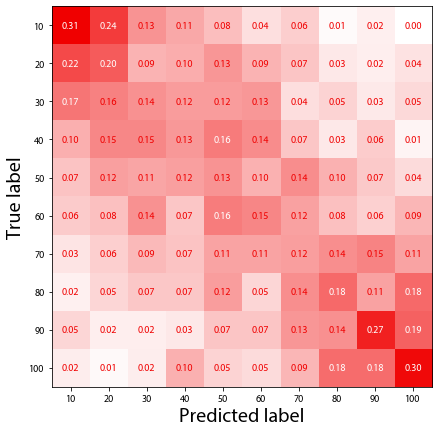

In [14]:
#read the data from files and merge the two data frames together

grocery_shopping_data = pd.read_csv('/Users/fb394/Dropbox/IMD_tesco_project/Data/year_lsoa_grocery.csv')

imd_data = pd.read_excel('/Users/fb394/Dropbox/IMD_tesco_project/Data/File_1_ID_2015_Index_of_Multiple_Deprivation.xlsx', sheet_name = 'IMD 2015', engine='openpyxl')

data = grocery_shopping_data.merge(imd_data, how = 'inner', left_on = 'area_id', right_on = 'LSOA code (2011)')

data.set_index('area_id', inplace = True)

#drop variables which are not relevant
data.drop(['transaction_days','num_transactions', 'man_day','population', 'male','female',
           'age_0_17','age_18_64','age_65+', 'avg_age','area_sq_km','people_per_sq_km','LSOA code (2011)',
           'LSOA name (2011)','Local Authority District code (2013)','Local Authority District name (2013)',
           'Index of Multiple Deprivation (IMD) Decile (where 1 is most deprived 10% of LSOAs)', 'representativeness_norm',], axis = 1, inplace = True)

#transform the data for classification
Y = data['Index of Multiple Deprivation (IMD) Rank (where 1 is most deprived)'].rank()

true_deciles = pd.qcut(Y, q = 10, labels = ['10','20','30','40','50','60','70','80','90','100'])

data.drop(['Index of Multiple Deprivation (IMD) Rank (where 1 is most deprived)'], axis = 1, inplace = True)

#split the data in a training and testing set

X_train, X_test, y_train, y_test = train_test_split(data, true_deciles, test_size = 0.3)

#create the decision tree object and fit it to the data
regr = tree.DecisionTreeClassifier(max_depth = 150)

creg = regr.fit(X_train,y_train)

#generate some predictions using the test set
predictions = pd.DataFrame(creg.predict(X_test), index = X_test.index, columns = {'Predicted rank'})

predicted_ranks = predictions.merge(Y, on = 'area_id', how = 'left')

predicted_ranks['true_deciles'] = true_deciles

#plot the predictions in the form of a confusion matrix
fig, ax = plt.subplots(figsize=(7,7))
ax.set_xlabel('Users_id',fontsize=20)
ax.set_ylabel('Users_id',fontsize=20)
cmap = LinearSegmentedColormap.from_list('mycmap', ['#FFFFFF','#F00000'])
conf_mat = plot_confusion_matrix(creg,X_test, y_test, labels = ['10','20','30','40','50','60','70','80','90','100'], 
                                 cmap = cmap, include_values = True, colorbar = False, normalize = 'true', values_format = '.2f', ax = ax)


Let's try and repeat the same analysis using a random forest now!

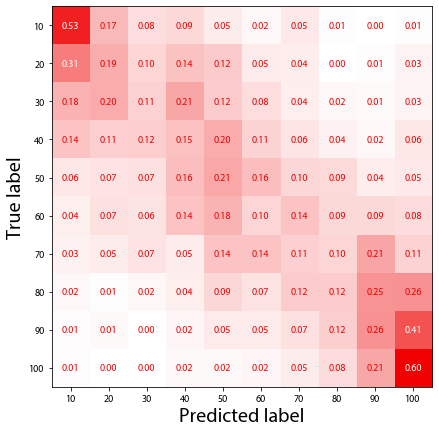

In [15]:
#load the scikit-learn function for random forest classifiers
from sklearn.ensemble import RandomForestClassifier

#create the random forest object and fit it to the data
regr = RandomForestClassifier(n_estimators = 200, random_state = 0, max_depth = 150)

creg = regr.fit(X_train,y_train)

#generate some predictions using the test set
predictions = pd.DataFrame(creg.predict(X_test), index = X_test.index, columns = {'Predicted rank'})

predicted_ranks = predictions.merge(Y, on = 'area_id', how = 'left')

predicted_ranks['true_deciles'] = true_deciles

#plot the predictions in the form of a confusion matrix
fig, ax = plt.subplots(figsize=(7,7))
ax.set_xlabel('Users_id',fontsize=20)
ax.set_ylabel('Users_id',fontsize=20)
cmap = LinearSegmentedColormap.from_list('mycmap', ['#FFFFFF','#F00000'])
conf_mat = plot_confusion_matrix(creg,X_test, y_test, labels = ['10','20','30','40','50','60','70','80','90','100'], 
                                 cmap = cmap, include_values = True, colorbar = False, normalize = 'true', values_format = '.2f', ax = ax)

